In [16]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import os, sys
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
from load_data import load_data

data = load_data('../data/archive.zip', filename='loan_data.csv')
data = pd.read_csv('../data/loan_data.csv')

In [4]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
data.shape

(45000, 14)

In [6]:
data_types = data.dtypes

data_types

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [22]:
data['person_age'] = data['person_age'].astype('int')
data['person_age'].dtype

dtype('int64')

In [8]:
missing_values = data.isnull().sum()
missing_values

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
summary_statistics = data.describe()
summary_statistics

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [10]:
categorical_columns = [var for var in data.columns if data[var].dtype == 'object']
numerical_columns = [var for var in data.columns if data[var].dtype != 'object']

print(f'Categorical Columns {categorical_columns}')
print(f'Numerical Columns {numerical_columns}')

Categorical Columns ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical Columns ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [11]:
categorical_columns

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [12]:
data['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [13]:
data['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

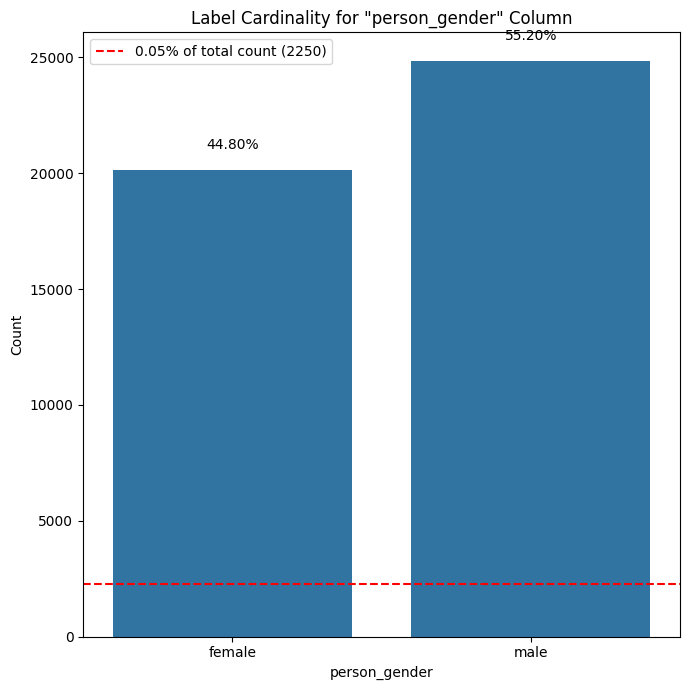

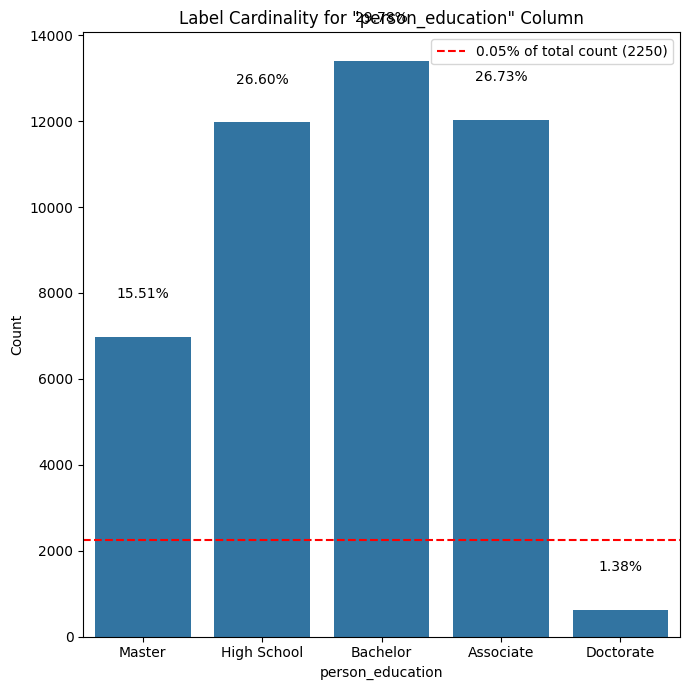

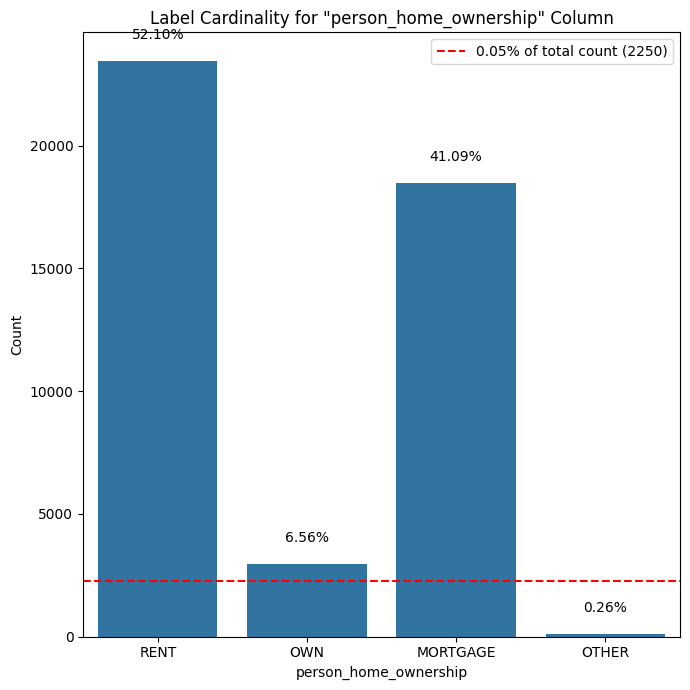

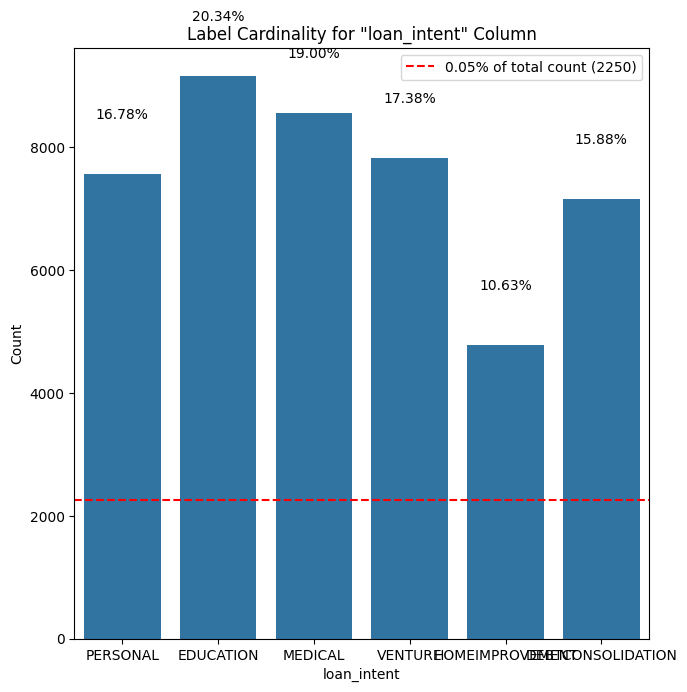

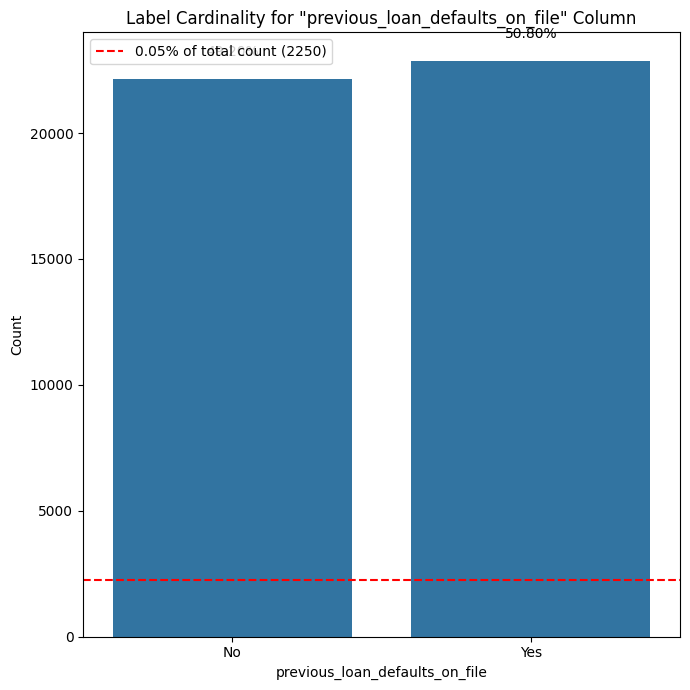

In [17]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')
    
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")
    
    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()
    
    plt.legend()
    plt.show()

for col in categorical_columns:
    plot_categorical_column(data, col)